# **LDA With Gensim**

## Pengumpulan Data

Pengumpulan data dilakukan dengan upload data dalam bentuk csv

In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Setelah upload, tampilkan nama file
for filename in uploaded.keys():
    print(f"File uploaded: {filename}")

# Baca file CSV
data = pd.read_csv(filename, on_bad_lines='skip')

# Tampilkan isi
data.head()


Saving prepocessing_berita.csv to prepocessing_berita.csv
File uploaded: prepocessing_berita.csv


,No,ID Berita,Judul,Kategori,Isi,cleaned_Isi,tokenized_Isi,stopwords_removed_Isi,stemmed_Isi
0,1,debat,Debat Sengit Komisi II DPR dan Baleg Berebut B...,nasional,SUASANA rapat koordinasi antara pimpinan komis...,suasana rapat koordinasi antara pimpinan komis...,"['suasana', 'rapat', 'koordinasi', 'antara', '...","['suasana', 'rapat', 'koordinasi', 'pimpinan',...","['suasana', 'rapat', 'koordinasi', 'pimpin', '..."
1,2,sengketa,Sengketa Pilkada Ulang Barito Utara dan Papua ...,nasional,MAHKAMAH Konstitusi ( MK ) menyelesaikan Permo...,mahkamah konstitusi mk menyelesaikan permohona...,"['mahkamah', 'konstitusi', 'mk', 'menyelesaika...","['mahkamah', 'konstitusi', 'mk', 'menyelesaika...","['mahkamah', 'konstitusi', 'mk', 'selesai', 'm..."
2,3,respons,Respons Pemerintah dan Tentara soal MK Tolak G...,nasional,WAKIL Menteri Hukum Eddy Hiariej menghormati p...,wakil menteri hukum eddy hiariej menghormati p...,"['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...","['wakil', 'menteri', 'hukum', 'eddy', 'hiariej...","['wakil', 'menteri', 'hukum', 'eddy', 'hiariej..."
3,4,rangkap,"Rangkap Jabatan Menpora dan Ketum PSSI, Erick ...",nasional,MENTERI Pemuda dan Olahraga Erick Thohir belum...,menteri pemuda dan olahraga erick thohir belum...,"['menteri', 'pemuda', 'dan', 'olahraga', 'eric...","['menteri', 'pemuda', 'olahraga', 'erick', 'th...","['menteri', 'pemuda', 'olahraga', 'erick', 'th..."
4,5,hadiri,"Hadiri Acara The Taste of Papua, Fatma Saifull...",nasional,INFO NASIONAL - Wakil Ketua Bidang 3 Solidarit...,info nasional wakil ketua bidang solidaritas p...,"['info', 'nasional', 'wakil', 'ketua', 'bidang...","['info', 'nasional', 'wakil', 'ketua', 'bidang...","['info', 'nasional', 'wakil', 'ketua', 'bidang..."


### Tampilkan Kolom Isi

Menampilkan kolom isi dari data yang sudah dibaca

In [2]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['Isi']]

# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'.
documents = data_text

# Tampilkan semua baris data
print(documents)

                                                  Isi
0   SUASANA rapat koordinasi antara pimpinan komis...
1   MAHKAMAH Konstitusi ( MK ) menyelesaikan Permo...
2   WAKIL Menteri Hukum Eddy Hiariej menghormati p...
3   MENTERI Pemuda dan Olahraga Erick Thohir belum...
4   INFO NASIONAL - Wakil Ketua Bidang 3 Solidarit...
..                                                ...
95  MENTERI Sekretaris Negara Prasetyo Hadi mengat...
96  POLRES Jakarta Timur segera mengembalikan dua ...
97  MENTERI Koordinator Bidang Hukum, Hak Asasi Ma...
98  JAKSA Penuntut Umum (JPU) menghadirkan lima or...
99  POLRI mengklaim sudah mengambil langkah untuk ...

[100 rows x 1 columns]


In [3]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['Isi']]
data_text['index'] = data_text.index

# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'
documents = data_text

# Tampilkan semua baris data
print(documents)

                                                  Isi  index
0   SUASANA rapat koordinasi antara pimpinan komis...      0
1   MAHKAMAH Konstitusi ( MK ) menyelesaikan Permo...      1
2   WAKIL Menteri Hukum Eddy Hiariej menghormati p...      2
3   MENTERI Pemuda dan Olahraga Erick Thohir belum...      3
4   INFO NASIONAL - Wakil Ketua Bidang 3 Solidarit...      4
..                                                ...    ...
95  MENTERI Sekretaris Negara Prasetyo Hadi mengat...     95
96  POLRES Jakarta Timur segera mengembalikan dua ...     96
97  MENTERI Koordinator Bidang Hukum, Hak Asasi Ma...     97
98  JAKSA Penuntut Umum (JPU) menghadirkan lima or...     98
99  POLRI mengklaim sudah mengambil langkah untuk ...     99

[100 rows x 2 columns]


membuat salinan aman dari kolom teks (Isi), menambahkan kolom indeks, lalu menyimpannya ke variabel documents untuk digunakan di tahap berikutnya seperti tokenization, dictionary building, atau LDA modeling

Melihat banyaknya data

In [4]:
len(documents)

100

## **Data Prepoceesing**

### Instalasi dan Import Library

In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Stemming & Stopword

In [4]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:

            result.append(lemmatize_stemming(token))
    return result

membersihkan teks dari stopwords, tanda baca, dan kata pendek, lalu mengembalikan kata dasar (root words).
Langkah ini penting agar model seperti LDA (Latent Dirichlet Allocation) dapat mengenali pola topik secara lebih akurat tanpa terganggu variasi bentuk kata.

### Persiapan modeling (LDA)

In [5]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

# Unduh data NLTK
nltk.download('stopwords')
nltk.download('wordnet')

try:
    # Muat data dari file CSV
    data = pd.read_csv('prepocessing_berita.csv', on_bad_lines='skip')

    # KUNCI PERBAIKAN: Pastikan documents adalah list of strings
    documents = data['Isi'].values.tolist()

    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []


# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Bagian 3: Mencoba Mengakses Dokumen Tertentu ---
    # Tentukan nomor dokumen yang ingin Anda ambil
    # Berdasarkan output Anda, total dokumen adalah 60
    document_num = 60

    # Cek apakah nomor dokumen valid
    if 1 <= document_num <= len(documents):
        # Ambil dokumen menggunakan indeks list (document_num - 1)
        doc_sample = documents[document_num - 1]

        print("\nOriginal document:")
        words = doc_sample.split()
        print(words)

        print("\n\nTokenized and lemmatized document:")
        print(tokenisasi_dan_filter(doc_sample))
    else:
        print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total 100 dokumen berhasil dimuat.

Original document:
['KEBERADAAN', 'hiu', 'paus', 'di', 'perairan', 'Indonesia', 'masih', 'menghadapi', 'tantangan', 'serius,', 'mulai', 'dari', 'keterdamparan', 'hingga', 'praktik', 'wisata', 'yang', 'belum', 'terkelola', 'dengan', 'baik.', 'Rencana', 'Aksi', 'Nasional', 'Konservasi', 'Hiu', 'Paus', '...']


Tokenized and lemmatized document:
['keberadaan', 'hiu', 'paus', 'perairan', 'indonesia', 'menghadapi', 'tantangan', 'serius', 'keterdamparan', 'praktik', 'wisata', 'terkelola', 'rencana', 'aksi', 'nasional', 'konservasi', 'hiu', 'paus']


1. Membaca dataset berita (prepocessing_berita.csv)

2. Menyiapkan daftar dokumen (list teks berita)

3. Membersihkan teks (hapus stopwords, lemmatize, tokenisasi)

4. Menampilkan hasil preprocessing dari salah satu dokumen

In [6]:
processed_docs = [preprocess(doc) for doc in data['Isi'].values]

In [7]:
processed_docs = data['Isi'].apply(preprocess)

print(processed_docs[:100])

0     [suasana, rapat, koordinasi, antara, pimpinan,...
1     [mahkamah, konstitusi, menyelesaikan, permohon...
2     [wakil, menteri, hukum, eddy, hiariej, menghor...
3     [menteri, pemuda, olahraga, erick, thohir, bel...
4     [info, nasional, wakil, ketua, bidang, solidar...
                            ...                        
95    [menteri, sekretaris, negara, prasetyo, hadi, ...
96    [polres, jakarta, timur, segera, mengembalikan...
97    [menteri, koordinator, bidang, hukum, asasi, m...
98    [jaksa, penuntut, umum, menghadirkan, lima, or...
99    [polri, mengklaim, sudah, mengambil, langkah, ...
Name: Isi, Length: 100, dtype: object


membersihkan seluruh teks di kolom Isi menggunakan fungsi preprocess, lalu menampilkan 100 hasil pertama untuk memastikan teks sudah siap digunakan untuk analisis seperti pembuatan dictionary, corpus, atau model LDA.

## **Get a BOW Dict from data**

### Pembuatanan dictionary

In [8]:
print("Contoh isi processed_docs:")
for i, doc in enumerate(processed_docs[:5]):
    print(f"Dokumen {i+1}:", doc)

dictionary = gensim.corpora.Dictionary(processed_docs)

# Kode ini akan mengiterasi dan mencetak semua item dalam kamus
for k, v in dictionary.items():
    print(k, v)

Contoh isi processed_docs:
Dokumen 1: ['suasana', 'rapat', 'koordinasi', 'antara', 'pimpinan', 'komisi', 'komisi', 'dengan', 'badan', 'legislasi', 'dewan', 'perwakilan', 'rakyat', 'pada', 'rabu', 'sore', 'september', 'sempat', 'memanas', 'momen', 'terjadi', 'saat', 'wakil', 'ketua', 'baleg', 'ahmad']
Dokumen 2: ['mahkamah', 'konstitusi', 'menyelesaikan', 'permohonan', 'perselisihan', 'hasil', 'pemilihan', 'umum', 'phpu', 'untuk', 'kabupaten', 'barito', 'utara', 'provinsi', 'papua', 'pada', 'rabu', 'september', 'ketua', 'suhartoyo', 'membacakan']
Dokumen 3: ['wakil', 'menteri', 'hukum', 'eddy', 'hiariej', 'menghormati', 'putusan', 'mahkamah', 'konstitusi', 'nomor', 'xxiii', 'yang', 'menolak', 'sepenuhnya', 'gugatan', 'formil', 'atas', 'undang', 'undang', 'tentara', 'nasional', 'indonesia', 'atau']
Dokumen 4: ['menteri', 'pemuda', 'olahraga', 'erick', 'thohir', 'belum', 'mengetahui', 'nasibnya', 'sebagai', 'ketua', 'umum', 'persatuan', 'sepak', 'bola', 'seluruh', 'indonesia', 'pssi', 'er

1. Menampilkan beberapa hasil tokenisasi untuk pengecekan manual.

2. Membuat kamus (dictionary) berisi semua kata unik dari dokumen.

3. Menampilkan seluruh isi kamus untuk memastikan proses pembuatan berhasil.

## **filter the dict**


In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print("Jumlah kata sebelum filter:", len(dictionary))
dictionary.filter_extremes(no_below=2, no_above=0.5)
print("Jumlah kata setelah filter:", len(dictionary))


Jumlah kata sebelum filter: 1124
Jumlah kata setelah filter: 362


## **Convert document into BOW format by doc2bow**

### Menghitung total kemunculan setiap kata di seluruh dokumen

In [10]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [11]:
# Buat kamus (dictionary) untuk menyimpan total hitungan kata
total_word_counts = {}

# Iterasi melalui setiap dokumen di bow_corpus
for bow_doc in bow_corpus:
    # Iterasi melalui setiap pasangan word_id dan count dalam dokumen
    for word_id, count in bow_doc:
        # Dapatkan kata asli dari dictionary
        word = dictionary[word_id]

        # Tambahkan hitungan ke total word counts
        if word in total_word_counts:
            total_word_counts[word] += count
        else:
            total_word_counts[word] = count

# Urutkan kata-kata berdasarkan total hitungannya secara menurun
sorted_words = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)

# Cetak hitungan kata yang digabungkan untuk semua dokumen
print("Total hitungan kata untuk semua dokumen:")
for word, count in sorted_words:
    print(f"Kata '{word}' muncul {count} kali.")

Total hitungan kata untuk semua dokumen:
Kata 'pada' muncul 42 kali.
Kata 'september' muncul 30 kali.
Kata 'indonesia' muncul 29 kali.
Kata 'yang' muncul 29 kali.
Kata 'rabu' muncul 23 kali.
Kata 'dari' muncul 22 kali.
Kata 'akan' muncul 21 kali.
Kata 'dalam' muncul 20 kali.
Kata 'menteri' muncul 19 kali.
Kata 'badan' muncul 16 kali.
Kata 'dengan' muncul 15 kali.
Kata 'komisi' muncul 15 kali.
Kata 'atau' muncul 15 kali.
Kata 'jakarta' muncul 15 kali.
Kata 'champion' muncul 14 kali.
Kata 'liga' muncul 14 kali.
Kata 'nasional' muncul 13 kali.
Kata 'mengatakan' muncul 13 kali.
Kata 'negara' muncul 13 kali.
Kata 'pertandingan' muncul 13 kali.
Kata 'undang' muncul 12 kali.
Kata 'erick' muncul 12 kali.
Kata 'prabowo' muncul 12 kali.
Kata 'laga' muncul 12 kali.
Kata 'untuk' muncul 11 kali.
Kata 'ketua' muncul 10 kali.
Kata 'sebagai' muncul 10 kali.
Kata 'presiden' muncul 10 kali.
Kata 'umum' muncul 9 kali.
Kata 'pssi' muncul 9 kali.
Kata 'korupsi' muncul 9 kali.
Kata 'hari' muncul 9 kali.
Kat

## **TF-IDF on our document set**

### model TF-IDF (Term Frequency – Inverse Document Frequency)

In [12]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [13]:
corpus_tfidf = tfidf[bow_corpus]

In [14]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.3028992033728103), (1, 0.23195285864082288), (2, 0.14189268946397493), (3, 0.1468897630017084), (4, 0.21783610773369586), (5, 0.1864418500641932), (6, 0.3159394833863838), (7, 0.2715049457033077), (8, 0.0835298224389368), (9, 0.23195285864082288), (10, 0.3028992033728103), (11, 0.11379372767729808), (12, 0.2059005649073204), (13, 0.2715049457033077), (14, 0.3028992033728103), (15, 0.09322092503209661), (16, 0.23195285864082288), (17, 0.2715049457033077), (18, 0.21783610773369586)]
[(5, 0.24428358623667265), (8, 0.10944412199337435), (11, 0.14909710388884614), (15, 0.12214179311833634), (19, 0.32655161616776107), (20, 0.3557366642444345), (21, 0.3557366642444345), (22, 0.32655161616776107), (23, 0.39687067920997865), (24, 0.24428358623667265), (25, 0.22392575217099941), (26, 0.39687067920997865)]
[(18, 0.21843194079944206), (21, 0.27224757568254615), (22, 0.24991206915855926), (27, 0.24991206915855926), (28, 0.14729154110326645), (29, 0.3037277040416633), (30, 0.21843194079944206

1. Membuat model TF-IDF dari data Bag-of-Words (bow_corpus),

2. Mengonversi seluruh korpus menjadi representasi berbobot,

3. Mencetak hasil TF-IDF dari setiap dokumen.

## **Running LDA using Bag of Words data**

In [15]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=625,
                                       id2word = dictionary,
                                       passes = 50,
                                       workers=2)

/usr/local/lib/python3.12/dist-packages/gensim/models/ldamodel.py:850: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [16]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 117 
Words: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 517 
Words: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 171 
Words: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 256 
Words: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 596 
Words: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.0

Pertama, dilakukan pelatihan model LDA menggunakan data korpus dalam format bag-of-words (bow_corpus) yang sebelumnya sudah diproses dan dikonversi dari teks mentah menjadi representasi numerik.
Model ini dilatih dengan fungsi gensim.models.LdaMulticore, yang memungkinkan pemrosesan paralel menggunakan beberapa inti prosesor (dalam hal ini dua inti dengan parameter workers=2).

Pada saat pelatihan, model berusaha untuk menemukan 625 topik tersembunyi (latent topics) dalam kumpulan dokumen berdasarkan pola kemunculan kata.
Setiap topik diwakili oleh sekumpulan kata dengan bobot tertentu, yang menunjukkan seberapa besar kontribusi kata tersebut terhadap topik.
Parameter passes=50 menunjukkan bahwa proses pelatihan dilakukan sebanyak 50 kali iterasi untuk memastikan model menghasilkan distribusi topik yang lebih stabil.
Sedangkan id2word=dictionary digunakan agar model dapat menerjemahkan setiap word ID kembali ke bentuk kata aslinya, bukan angka.

## **Topic coherence**

In [17]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.49775511959383856


In [18]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -13.793737963834499


mengevaluasi seberapa baik topik-topik yang dihasilkan oleh model LDA, dengan membandingkan dua metode perhitungan koherensi

## **find the optimal number of topics**

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Ubah 'passes' menjadi nilai yang lebih besar, misalnya 50
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

* Fungsi ini menjalankan model LDA berulang kali dengan jumlah topik yang berbeda (misalnya 2, 8, 14, dst tergantung parameter start, limit, step).

* Setiap kali model LDA selesai dilatih, dihitung coherence score-nya menggunakan CoherenceModel.

* Nilai coherence ini menunjukkan seberapa koheren (konsisten secara semantik) kata-kata di dalam setiap topik — semakin tinggi nilainya, semakin baik kualitas topiknya.

* Hasil akhirnya adalah dua list:

  * model_list: daftar model LDA yang dihasilkan.

  * coherence_values: daftar nilai coherence dari masing-masing model.

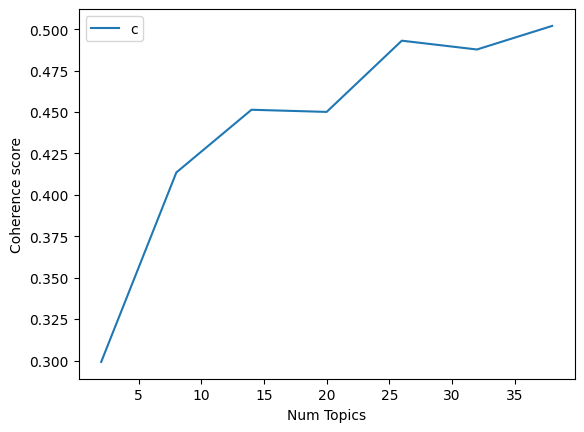

In [21]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

Grafik pada gambarmu menunjukkan sumbu X = jumlah topik (Num Topics) dan sumbu Y = Coherence Score.

Nilai coherence meningkat seiring bertambahnya jumlah topik, lalu mulai stabil di sekitar 25–35 topik.

Artinya: jumlah topik optimal berada pada kisaran 25–35, karena setelah itu kenaikan coherence score tidak terlalu signifikan lagi.

## **Running LDA using TF-IDF**

In [22]:
lda_model_tfidf = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=100
    ,
    id2word=dictionary,
    passes=50,  # Nilai yang ditingkatkan
    workers=4
)

In [23]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 1 Word: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 2 Word: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 3 Word: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic: 4 Word: 0.003*"hujan" + 0.003*"geofisika" + 0.003*"mereka" + 0.003*"digelar" + 0.003*"sebagian" + 0.003*"petir" + 0.003*"meteorologi" + 0.003*"lebat" + 0.003*"klimatologi" + 0.003*"kencang"


Topic

Kode ini membangun model LDA berbasis TF-IDF untuk menemukan 100 topik tersembunyi dalam kumpulan teks. Setelah model selesai dilatih, program menampilkan setiap topik beserta kumpulan kata-kata penting yang membentuknya, sehingga peneliti dapat memahami tema utama yang muncul dalam dokumen.

In [24]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.4977551195938386


## **classifying sample document using LDA Bag of Words model**

In [25]:
# Asumsikan 'documents' sudah didefinisikan dari sel sebelumnya
document_num = 100

# Pastikan nomor dokumen yang dipilih valid
if 1 <= document_num <= len(documents):
    # Ambil dokumen asli (sebagai string)
    doc_sample_string = documents[document_num - 1]

    print("Original document:")
    print(doc_sample_string)

    print("\n\nTokenized and lemmatized document:")
    # Panggil fungsi preprocess dengan string asli
    print(preprocess(doc_sample_string))
else:
    print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

Original document:
POLRI mengklaim sudah mengambil langkah untuk menelusuri tiga orang yang dilaporkan hilang usai demonstrasi ricuh di Jakarta pada akhir Agustus lalu. Kepala Biro Penerangan Masyarakat Divisi Humas Pol...


Tokenized and lemmatized document:
['polri', 'mengklaim', 'sudah', 'mengambil', 'langkah', 'untuk', 'menelusuri', 'tiga', 'orang', 'yang', 'dilaporkan', 'hilang', 'usai', 'demonstrasi', 'ricuh', 'jakarta', 'pada', 'akhir', 'agustus', 'lalu', 'kepala', 'biro', 'penerangan', 'masyarakat', 'divisi', 'humas']


Kode ini mengambil dokumen ke-100 dari dataset, menampilkan teks aslinya, lalu menunjukkan hasil pembersihan dan tokenisasi agar peneliti dapat memverifikasi proses praprosesan teks sebelum digunakan dalam model topik (LDA).

### melihat topik dominan pada setiap dokumen

In [31]:
lda_model = LdaModel(corpus=bow_corpus, num_topics=10, id2word=dictionary, passes=15)


In [32]:
for i in range(len(bow_corpus)):
    print(f"\nDokumen ke-{i+1}:")
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True):
        print("\tSkor: {:.4f}\tTopik: {}".format(score, lda_model.print_topic(index, 5)))



Dokumen ke-1:
	Skor: 0.6243	Topik: 0.062*"pada" + 0.039*"september" + 0.035*"liga" + 0.031*"akan" + 0.029*"champion"
	Skor: 0.3376	Topik: 0.035*"komisi" + 0.030*"dengan" + 0.030*"undang" + 0.026*"rakyat" + 0.025*"korupsi"

Dokumen ke-2:
	Skor: 0.9308	Topik: 0.039*"pada" + 0.023*"umum" + 0.022*"ketua" + 0.022*"rabu" + 0.018*"korupsi"

Dokumen ke-3:
	Skor: 0.9500	Topik: 0.029*"undang" + 0.027*"akan" + 0.025*"indonesia" + 0.023*"mengatakan" + 0.021*"atau"

Dokumen ke-4:
	Skor: 0.9609	Topik: 0.044*"erick" + 0.042*"pssi" + 0.031*"ketua" + 0.030*"thohir" + 0.029*"pada"

Dokumen ke-5:
	Skor: 0.9182	Topik: 0.027*"bandung" + 0.024*"yang" + 0.021*"september" + 0.018*"indonesia" + 0.018*"jakarta"

Dokumen ke-6:
	Skor: 0.8414	Topik: 0.029*"undang" + 0.027*"akan" + 0.025*"indonesia" + 0.023*"mengatakan" + 0.021*"atau"
	Skor: 0.1086	Topik: 0.047*"menteri" + 0.045*"negara" + 0.035*"presiden" + 0.030*"subianto" + 0.027*"prabowo"

Dokumen ke-7:
	Skor: 0.6175	Topik: 0.027*"untuk" + 0.023*"yang" + 0.019

Kode ini menganalisis setiap dokumen dan menampilkan daftar topik beserta skor probabilitasnya dari hasil model LDA, sehingga peneliti bisa memahami topik apa yang paling banyak dibahas dalam masing-masing dokumen.

### melihat hasil analisis topik LDA pada suatu dokumen

In [34]:
document_num = int(input(f"Masukkan nomor dokumen (1–{len(bow_corpus)}): ")) - 1

if 0 <= document_num < len(bow_corpus):
    print("Original document:")
    print(documents[document_num])
    print("\nTokenized and lemmatized document:")
    print(preprocess(documents[document_num]))

    print("\nTopik dan skor:")
    for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
        print(f"\tSkor: {score:.4f}\tTopik: {lda_model.print_topic(index, 5)}")
else:
    print(f"Nomor dokumen {document_num+1} tidak valid. Pilih antara 1 dan {len(bow_corpus)}.")


Masukkan nomor dokumen (1–100): 5
Original document:
INFO NASIONAL - Wakil Ketua Bidang 3 Solidaritas Perempuan Untuk Indonesia (SERUNI) Kabinet Merah Putih (KMP), Fatma Saifullah Yusuf, menghadiri acara bertajuk 'The Taste of Papua: A Journey of Gastro...

Tokenized and lemmatized document:
['info', 'nasional', 'wakil', 'ketua', 'bidang', 'solidaritas', 'perempuan', 'untuk', 'indonesia', 'seruni', 'kabinet', 'merah', 'putih', 'fatma', 'saifullah', 'yusuf', 'menghadiri', 'acara', 'bertajuk', 'taste', 'papua', 'journey', 'gastro']

Topik dan skor:
	Skor: 0.9182	Topik: 0.027*"bandung" + 0.024*"yang" + 0.021*"september" + 0.018*"indonesia" + 0.018*"jakarta"


### melihat hasil pemetaan topik

In [35]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(7, 0.9181655)]

mengurutkan topik-topik dalam satu dokumen berdasarkan relevansinya.

In [36]:
lda_model.print_topic(index, 581)

'0.027*"bandung" + 0.024*"yang" + 0.021*"september" + 0.018*"indonesia" + 0.018*"jakarta" + 0.016*"pusat" + 0.016*"grup" + 0.016*"sailors" + 0.016*"city" + 0.016*"lion" + 0.016*"league" + 0.016*"persib" + 0.016*"champion" + 0.015*"laga" + 0.015*"udang" + 0.015*"bidang" + 0.015*"rabu" + 0.013*"badan" + 0.011*"info" + 0.011*"resmi" + 0.011*"nasional" + 0.011*"istana" + 0.011*"pada" + 0.011*"angin" + 0.011*"sebagian" + 0.011*"meteorologi" + 0.011*"hujan" + 0.011*"bmkg" + 0.011*"geofisika" + 0.011*"besar" + 0.011*"dapat" + 0.011*"hari" + 0.011*"disertai" + 0.011*"wilayah" + 0.011*"kencang" + 0.011*"petir" + 0.011*"lebat" + 0.011*"klimatologi" + 0.011*"penyisihan" + 0.011*"perdana" + 0.011*"pertandingan" + 0.009*"ekspor" + 0.009*"radioaktif" + 0.009*"ketika" + 0.009*"pangan" + 0.009*"koordinator" + 0.009*"kementerian" + 0.008*"mengatakan" + 0.007*"akan" + 0.006*"pertama" + 0.006*"setelah" + 0.006*"memasuki" + 0.006*"kepada" + 0.006*"untuk" + 0.006*"transformasi" + 0.006*"kamis" + 0.006*"men

menampilkan isi detail dari topik yang relevan tersebut dalam bentuk daftar kata-kata pembentuk topik.

## **classifying sample document using LDA TF-IDF model**

### melatih model topik (LDA)

In [57]:
from gensim.models import LdaMulticore

# Latih model LDA dengan BoW
lda_model_bow = LdaMulticore(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=10,
    passes=50,
    workers=4,
    random_state=42
)

# Loop untuk semua dokumen di corpus
for doc_index, doc_bow in enumerate(bow_corpus):
    result = lda_model_bow[doc_bow]

    if result:
        # Urutkan dari skor tertinggi dan ambil 3 topik teratas
        top_topics = sorted(result, key=lambda tup: tup[1], reverse=True)[:3]
        print(f"\nTop 3 Topik untuk Dokumen ke-{doc_index + 1}:")

        for index, score in top_topics:
            print(f"  Skor: {score:.4f}\tTopik: {lda_model_bow.print_topic(index, 5)}")
    else:
        print(f"\nDokumen ke-{doc_index + 1}: Tidak ada topik terdeteksi.")



Top 3 Topik untuk Dokumen ke-1:
  Skor: 0.9571	Topik: 0.040*"yang" + 0.038*"indonesia" + 0.025*"dengan" + 0.024*"dari" + 0.022*"september"

Top 3 Topik untuk Dokumen ke-2:
  Skor: 0.7733	Topik: 0.046*"pada" + 0.036*"september" + 0.030*"rabu" + 0.028*"akan" + 0.028*"liga"
  Skor: 0.1651	Topik: 0.048*"pssi" + 0.043*"ketua" + 0.042*"erick" + 0.037*"umum" + 0.032*"thohir"

Top 3 Topik untuk Dokumen ke-3:
  Skor: 0.9500	Topik: 0.025*"pada" + 0.025*"yang" + 0.025*"september" + 0.022*"bandung" + 0.020*"nasional"

Top 3 Topik untuk Dokumen ke-4:
  Skor: 0.9609	Topik: 0.048*"pssi" + 0.043*"ketua" + 0.042*"erick" + 0.037*"umum" + 0.032*"thohir"

Top 3 Topik untuk Dokumen ke-5:
  Skor: 0.9182	Topik: 0.029*"yang" + 0.022*"untuk" + 0.022*"orang" + 0.022*"indonesia" + 0.022*"hilang"

Top 3 Topik untuk Dokumen ke-6:
  Skor: 0.9437	Topik: 0.029*"yang" + 0.022*"untuk" + 0.022*"orang" + 0.022*"indonesia" + 0.022*"hilang"

Top 3 Topik untuk Dokumen ke-7:
  Skor: 0.9471	Topik: 0.027*"indonesia" + 0.025*"

1. Melatih model LDA Multicore berbasis bag-of-words.

2. Menghitung distribusi topik untuk tiap dokumen.

3. Mengurutkan dan menampilkan tiga topik utama beserta kata-kata penyusunnya untuk setiap dokumen.

## **Testing model on unseen document**

### menguji model LDA

In [58]:
unseen_documents = unseen_documents = [
    "Harga Honda Vario September 2025, Mulai Rp 24 Jutaan" ,
    "Pebalap MotoGP Marc Marquez berhasil menjuarai balapan." ,
    "Apple merilis iPhone baru dengan fitur canggih."
]

# Lakukan perulangan untuk setiap dokumen
for i, unseen_doc in enumerate(unseen_documents):
    # Proses setiap dokumen secara terpisah
    bow_vector = dictionary.doc2bow(preprocess(unseen_doc))

    # Cetak judul atau nomor dokumen untuk kejelasan
    print(f"\n--- Analisis Dokumen ke-{i+1} ({unseen_doc}) ---")

    # Cetak hasil jika ada
    if bow_vector:
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
            print(f"Skor: {score:.4f}\t Topik: {lda_model_tfidf.print_topic(index, 5)}")
    else:
        print("Tidak ada kata yang terdeteksi di dokumen ini.")


--- Analisis Dokumen ke-1 (Harga Honda Vario September 2025, Mulai Rp 24 Jutaan) ---
Skor: 0.7750	 Topik: 0.014*"undang" + 0.013*"daya" + 0.013*"esdm" + 0.013*"mineral" + 0.013*"sumber"
Skor: 0.0250	 Topik: 0.014*"agung" + 0.011*"korupsi" + 0.011*"akan" + 0.010*"empat" + 0.010*"liga"
Skor: 0.0250	 Topik: 0.016*"ternyata" + 0.016*"dari" + 0.015*"bernama" + 0.013*"lalu" + 0.012*"subianto"
Skor: 0.0250	 Topik: 0.012*"agenda" + 0.012*"yang" + 0.012*"kembali" + 0.011*"atau" + 0.011*"gunung"
Skor: 0.0250	 Topik: 0.014*"sidang" + 0.012*"perkara" + 0.011*"jakarta" + 0.011*"pengadilan" + 0.011*"wilayah"
Skor: 0.0250	 Topik: 0.012*"liga" + 0.011*"satu" + 0.011*"tengah" + 0.011*"kerja" + 0.010*"hilang"
Skor: 0.0250	 Topik: 0.017*"bandung" + 0.013*"persib" + 0.013*"league" + 0.013*"sailors" + 0.013*"lion"
Skor: 0.0250	 Topik: 0.013*"mencapai" + 0.012*"amerika" + 0.012*"serikat" + 0.012*"presiden" + 0.012*"soal"
Skor: 0.0250	 Topik: 0.021*"komunikasi" + 0.012*"menjadi" + 0.012*"transformasi" + 0.0

1. Menguji generalisasi model LDA terhadap teks baru,

2. Mengidentifikasi topik dominan dalam kalimat baru berdasarkan model yang telah dilatih,

3. Memberikan wawasan bagaimana model memahami tema seperti “otomotif”, “olahraga”, dan “teknologi” hanya dari kata-kata yang muncul.

# **Tugas LDA**

In [63]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer
from google.colab import files

# --- Upload file dari komputer ---
print("Silakan unggah file CSV berisi kolom 'Isi':")
uploaded = files.upload()

# Ambil nama file pertama yang diunggah
filename = next(iter(uploaded.keys()))
print(f"\nFile '{filename}' berhasil diunggah.")

# --- Unduh resource NLTK ---
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# --- Membaca Data ---
try:
    data = pd.read_csv(io.BytesIO(uploaded[filename]), on_bad_lines='skip')
    documents = data['Isi'].dropna().tolist()
    print(f"✅ Total {len(documents)} dokumen berhasil dimuat.")
except KeyError:
    print("❌ Kolom 'Isi' tidak ditemukan dalam file CSV.")
    documents = []

# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    print("\n🔄 Melakukan tokenisasi dan pembuatan kamus...")
    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    kamus = Dictionary(data_token)
    kamus.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
    korpus = [kamus.doc2bow(teks) for teks in data_token]

    # --- Bagian 3: Membuat Model LDA ---
    num_topik = 20
    print("\n🧠 Melatih model LDA...")
    lda_model = LdaModel(
        korpus,
        num_topics=num_topik,
        id2word=kamus,
        passes=50,
        random_state=100
    )
    print("✅ Pelatihan LDA selesai.")

    # --- Bagian 4: Membuat Tabel Proporsi Kata dalam Topik ---
    all_topics = lda_model.show_topics(num_topics=num_topik, num_words=20, formatted=False)

    proporsi_kata = []
    for topic_id, word_weights in all_topics:
        for word, weight in word_weights:
            proporsi_kata.append([f"Topik {topic_id}", word, weight])

    df_proporsi_kata = pd.DataFrame(proporsi_kata, columns=['Topik', 'Kata', 'Proporsi'])
    print("\n--- Tabel 1: Proporsi Kata dalam Topik ---")
    print(df_proporsi_kata.head(10))

    # --- Bagian 5: Membuat Tabel Proporsi Topik dalam Dokumen ---
    proporsi_topik = []
    for i, doc_bow in enumerate(korpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)

        row_data = {'Dokumen ID': i}
        for topic_id, proporsi in doc_topics:
            row_data[f"Topik {topic_id}"] = proporsi

        proporsi_topik.append(row_data)

    df_proporsi_topik = pd.DataFrame(proporsi_topik).fillna(0)
    cols = ['Dokumen ID'] + [f'Topik {i}' for i in range(num_topik)]
    df_proporsi_topik = df_proporsi_topik[cols]
    print("\n--- Tabel 2: Proporsi Topik dalam Dokumen ---")
    print(df_proporsi_topik.head())

    # --- Bagian 6: Menyimpan dan Menyediakan File Unduhan ---
    csv_file1 = "proporsi_dokumen.csv"
    csv_file2 = "proporsi_kata.csv"

    df_proporsi_topik.to_csv(csv_file1, index=False)
    df_proporsi_kata.to_csv(csv_file2, index=False)

    print(f"\n💾 File '{csv_file1}' dan '{csv_file2}' berhasil dibuat.")
    print("⬇️ Silakan unduh file berikut:")

    files.download(csv_file1)
    files.download(csv_file2)

else:
    print("⚠️ Tidak dapat melanjutkan karena data dokumen tidak tersedia.")


Silakan unggah file CSV berisi kolom 'Isi':


Saving prepocessing_berita.csv to prepocessing_berita (4).csv

File 'prepocessing_berita (4).csv' berhasil diunggah.
✅ Total 100 dokumen berhasil dimuat.

🔄 Melakukan tokenisasi dan pembuatan kamus...

🧠 Melatih model LDA...
✅ Pelatihan LDA selesai.

--- Tabel 1: Proporsi Kata dalam Topik ---
     Topik        Kata  Proporsi
0  Topik 0   indonesia  0.057034
1  Topik 0        bank  0.048142
2  Topik 0      persen  0.048142
3  Topik 0       polri  0.032358
4  Topik 0    aplikasi  0.032358
5  Topik 0      kredit  0.032358
6  Topik 0  perusahaan  0.032358
7  Topik 0     pelatih  0.032357
8  Topik 0     jakarta  0.017081
9  Topik 0      negara  0.016872

--- Tabel 2: Proporsi Topik dalam Dokumen ---
   Dokumen ID   Topik 0   Topik 1   Topik 2   Topik 3   Topik 4   Topik 5  \
0           0  0.003333  0.003333  0.270002  0.386556  0.003333  0.003333   
1           1  0.005000  0.005000  0.005000  0.005000  0.005000  0.005000   
2           2  0.002778  0.002778  0.002778  0.002778  0.002778  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kode ini melakukan keseluruhan proses analisis topik secara otomatis:

1. Membaca data teks dari CSV,

2. Membersihkan dan mempersiapkan teks,

3. Melatih model LDA,

4. Menghasilkan tabel topik–kata dan dokumen–topik,

5. Menyediakan hasilnya dalam file CSV siap analisis.

# **Klasifikasi**

klasifikasi teks berbasis topik menggunakan LDA (Latent Dirichlet Allocation) dan Logistic Regression.

In [64]:
!pip install gensim scikit-learn pandas

In [65]:
# --- Import Library Utama ---
import pandas as pd
import re
import ast
import gensim
import numpy as np
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.utils import simple_preprocess
from google.colab import files

warnings.filterwarnings("ignore")

# --- 1. Upload File CSV ---
print("📂 Silakan unggah file CSV berisi kolom 'Isi' dan 'Kategori'")
uploaded = files.upload()

if not uploaded:
    raise SystemExit("❌ Tidak ada file yang diunggah.")

file_path = list(uploaded.keys())[0]
print(f"\n✅ File '{file_path}' berhasil diunggah.")

text_column = 'Isi'     # kolom teks
label_column = 'Kategori'      # kolom label kategori

# --- 2. Memuat Data ---
try:
    df = pd.read_csv(file_path)
    if text_column not in df.columns or label_column not in df.columns:
        print(f"❌ Error: Kolom '{text_column}' atau '{label_column}' tidak ditemukan.")
        print(f"Kolom tersedia: {list(df.columns)}")
        raise SystemExit
    df = df[[text_column, label_column]].copy()
    print(f"✅ Data berhasil dimuat. Total {len(df)} baris.")
except FileNotFoundError:
    raise SystemExit(f"❌ File '{file_path}' tidak ditemukan di direktori kerja.")

# --- 3. Normalisasi Kolom Token ---
def detect_list_format(sample):
    """Deteksi apakah kolom berisi list (misalnya ['kata']) atau teks biasa."""
    if isinstance(sample, str) and sample.strip().startswith('[') and sample.strip().endswith(']'):
        return "list"
    return "text"

if not df[text_column].dropna().empty:
    sample_data = str(df[text_column].dropna().iloc[0])
    data_format = detect_list_format(sample_data)
else:
    data_format = "unknown"

print(f"📄 Format data terdeteksi: {data_format}")

def normalize_tokens(value):
    """Pastikan setiap entri menjadi list token yang valid."""
    if isinstance(value, list):
        return [t for t in value if isinstance(t, str) and t.strip() != ""]
    if isinstance(value, str):
        value = value.strip()
        if value.startswith('[') and value.endswith(']'):
            try:
                parsed = ast.literal_eval(value)
                if isinstance(parsed, list):
                    return [t for t in parsed if isinstance(t, str) and t.strip() != ""]
            except Exception:
                pass
        # Jika string biasa, tokenize dengan gensim
        return simple_preprocess(value)
    return []

# Terapkan normalisasi
df['tokens'] = df[text_column].apply(normalize_tokens)

# Hitung jumlah dokumen kosong & tidak kosong
total_docs = len(df)
nonempty_docs = df['tokens'].apply(len).gt(0).sum()
empty_docs = total_docs - nonempty_docs
print(f"📊 Total dokumen: {total_docs}, Non-kosong: {nonempty_docs}, Kosong: {empty_docs}")

# Hapus baris kosong
df = df[df['tokens'].apply(len) > 0].reset_index(drop=True)
if df.empty:
    raise SystemExit("❌ Tidak ada dokumen berisi token setelah normalisasi. Periksa isi file CSV.")

# --- 4. Membuat Dictionary & Corpus untuk LDA ---
dictionary = gensim.corpora.Dictionary(df['tokens'])
if len(dictionary) == 0:
    raise SystemExit("❌ Dictionary kosong. Tidak ada kata yang bisa dipelajari.")
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
print(f"📘 Jumlah term unik: {len(dictionary)} | Jumlah dokumen: {len(corpus)}")

# --- 5. Pelatihan Model LDA ---
num_topics = min(8, len(df[label_column].unique()))  # jumlah topik disesuaikan jumlah kategori
workers = max(1, min(4, os.cpu_count() or 1))

print("\n🧠 Melatih model LDA...")
lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=50,
    workers=workers,
    random_state=42
)

print("✅ Model LDA berhasil dilatih.")

# --- 6. Mendapatkan vektor topik untuk setiap dokumen ---
def get_topic_vector(lda_model, bow_vector, num_topics):
    topic_weights = np.zeros(num_topics)
    topic_scores = lda_model.get_document_topics(bow_vector)
    for topic_id, score in topic_scores:
        if 0 <= topic_id < num_topics:
            topic_weights[topic_id] = score
    return topic_weights

X = np.array([get_topic_vector(lda_model, doc, num_topics) for doc in corpus])
y = df[label_column].values

# --- 7. Pelatihan & Evaluasi Logistic Regression ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 8. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n--- 📈 Hasil Klasifikasi ---")
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Laporan Klasifikasi:")
print(report)

# --- 9. Menampilkan Top Kata Tiap Topik ---
print("\n--- 🔍 Top Kata per Topik (Top 10) ---")
for t in range(num_topics):
    print(f"Topik {t}: ", [word for word, prob in lda_model.show_topic(t, topn=10)])

print("\n✅ Proses selesai tanpa error atau warning.")


📂 Silakan unggah file CSV berisi kolom 'Isi' dan 'Kategori'


Saving prepocessing_berita.csv to prepocessing_berita (5).csv

✅ File 'prepocessing_berita (5).csv' berhasil diunggah.
✅ Data berhasil dimuat. Total 100 baris.
📄 Format data terdeteksi: text
📊 Total dokumen: 100, Non-kosong: 100, Kosong: 0
📘 Jumlah term unik: 1235 | Jumlah dokumen: 100

🧠 Melatih model LDA...
✅ Model LDA berhasil dilatih.

--- 📈 Hasil Klasifikasi ---
Akurasi Model: 0.1500

Laporan Klasifikasi:
              precision    recall  f1-score   support

      bisnis       0.00      0.00      0.00         4
        bola       0.40      0.50      0.44         4
       metro       0.00      0.00      0.00         4
    nasional       0.11      0.25      0.15         4
       tekno       0.00      0.00      0.00         4

    accuracy                           0.15        20
   macro avg       0.10      0.15      0.12        20
weighted avg       0.10      0.15      0.12        20


--- 🔍 Top Kata per Topik (Top 10) ---
Topik 0:  ['di', 'dan', 'indonesia', 'yang', 'ini', 'akan'

kode ini:

1. Membaca dan membersihkan data teks.

2. Menganalisis topik laten menggunakan LDA.

3. Mengonversi hasil topik menjadi fitur numerik.

4. Melatih Logistic Regression untuk klasifikasi otomatis.

5. Menampilkan performa dan topik dominan tiap kategori.

# Hasil Klasifikasi

Model LDA + Logistic Regression hanya menghasilkan akurasi sebesar 0.15 (15%).
Artinya, dari total 20 data uji, hanya sekitar 3 dokumen yang diklasifikasikan dengan benar.

Analisis Metrik:

* Precision, Recall, dan F1-score rendah di semua kategori.
Ini berarti model belum mampu membedakan kategori berita (bisnis, bola, metro, nasional, tekno) dengan baik.

* Hanya kelas “bola” dan “nasional” yang menunjukkan sedikit kemampuan prediksi (recall 0.50 dan 0.25).

* Kelas lainnya (bisnis, metro, tekno) memiliki nilai 0.00 → model gagal mengenali dokumen dari kategori tersebut.

Kesimpulan sementara: fitur topik yang dihasilkan oleh LDA belum cukup representatif untuk memisahkan kategori berita secara akurat.